In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models  # type: ignore
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
#https://github.com/manidev01/Handwritten-Digit-Classification-using-CNNs-on-MNIST-Dataset/blob/main/tf.py

In [3]:
# 1. Load and Preprocess the Data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
# 2. Data Preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

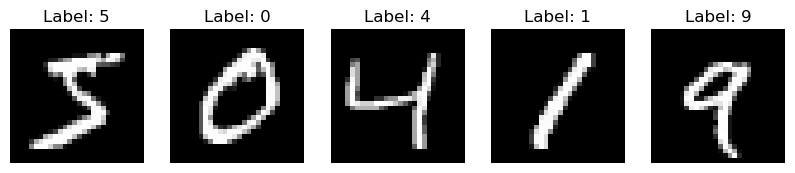

In [5]:
# 3. Exploratory Data Analysis (Optional: To visualize images)
def plot_images(images, labels, n=5):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_images(train_images, train_labels)

In [6]:
# 4. Build the CNN Model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),  # Dropout to prevent overfitting
        layers.Dense(10, activation='softmax')  # 10 classes (digits 0-9)
    ])
    return model


In [7]:
cnn_model = create_cnn_model()

# 5. Compile the Model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# 6. Train the Model and Capture History
history = cnn_model.fit(train_images, train_labels, epochs=10, 
                        validation_split=0.2,  
                        batch_size=64)

Epoch 1/10
750/750 [==============================] - 90s 116ms/step - loss: 0.2579 - accuracy: 0.9215 - val_loss: 0.0557 - val_accuracy: 0.9835
Epoch 2/10
750/750 [==============================] - 86s 114ms/step - loss: 0.0758 - accuracy: 0.9787 - val_loss: 0.0437 - val_accuracy: 0.9875
Epoch 3/10
750/750 [==============================] - 86s 115ms/step - loss: 0.0501 - accuracy: 0.9855 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 4/10
750/750 [==============================] - 86s 114ms/step - loss: 0.0413 - accuracy: 0.9879 - val_loss: 0.0421 - val_accuracy: 0.9885
Epoch 5/10
750/750 [==============================] - 85s 114ms/step - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.0392 - val_accuracy: 0.9896
Epoch 6/10
750/750 [==============================] - 85s 113ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 7/10
750/750 [==============================] - 85s 114ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0429 - val_ac

In [9]:
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)

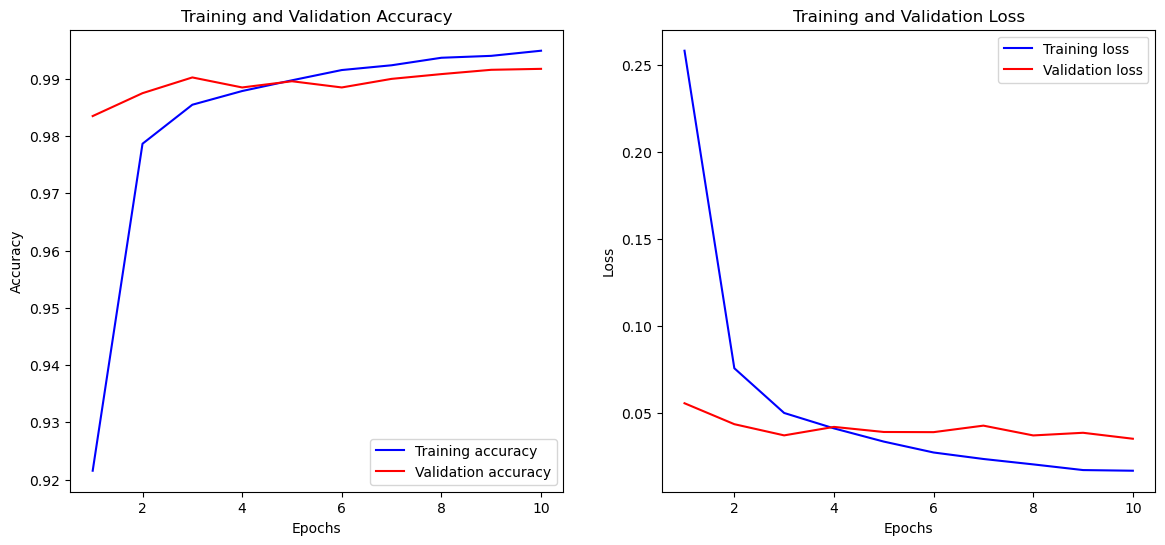

In [10]:
# Récupérer les informations d'entraînement à partir de l'objet 'history'
history_dict = history.history

# Définir les variables epochs, acc, val_acc, loss, et val_loss
epochs = range(1, len(history_dict['accuracy']) + 1)  # Nombre d'époques
acc = history_dict['accuracy']  # Précision sur l'ensemble d'entraînement
val_acc = history_dict['val_accuracy']  # Précision sur l'ensemble de validation
loss = history_dict['loss']  # Perte sur l'ensemble d'entraînement
val_loss = history_dict['val_loss']  # Perte sur l'ensemble de validation

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [11]:
# 8. Evaluate the Model on Test Data
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 5s - loss: 0.0228 - accuracy: 0.9927 - 5s/epoch - 16ms/step
Test accuracy: 0.9927


In [12]:
# 9. Model Evaluation Metrics
y_pred = cnn_model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 5s 17ms/step


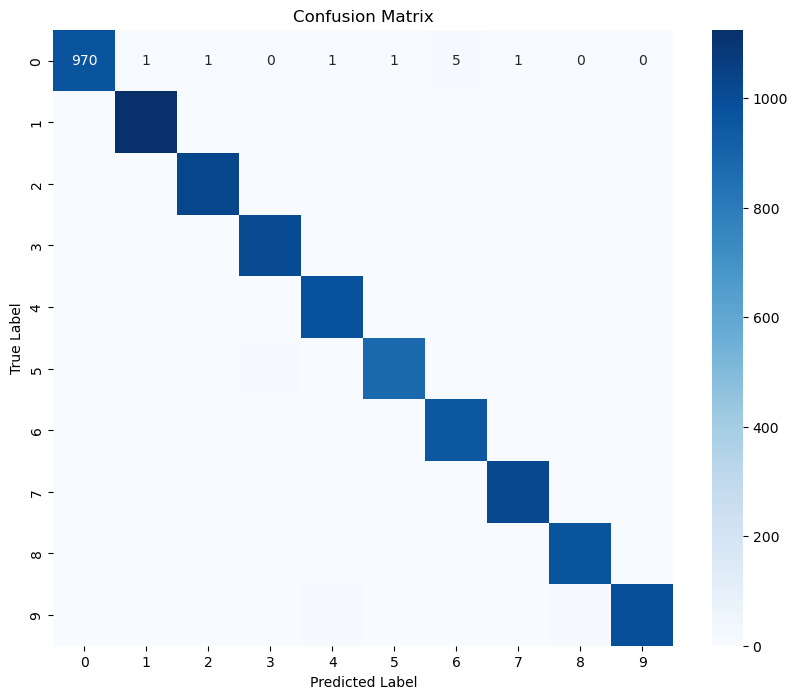

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [14]:
# Classification report
report = classification_report(test_labels, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      1.00      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



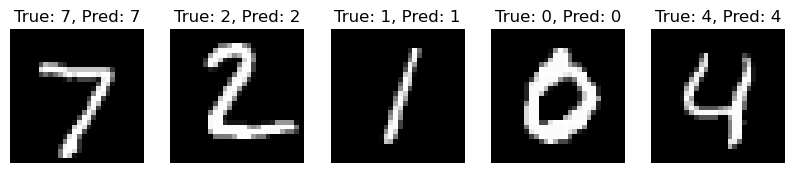

In [15]:
# 10. Visualize Predictions
def plot_predictions(images, true_labels, pred_labels, n=5):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}, Pred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(test_images, test_labels, y_pred_classes)

1/1 [==============================] - 0s 49ms/step
Classe prédite: 3
Précision: 25.55%


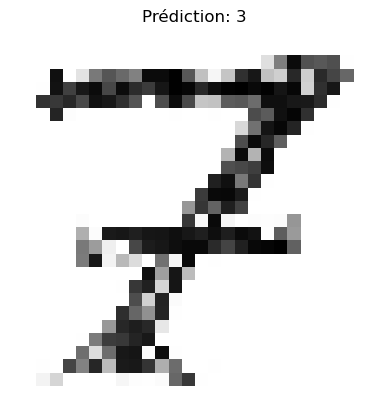

In [16]:
#predire nombre 
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Charger et prétraiter l'image
img_path = 'downloadp.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')  # Change target_size selon ton modèle
img_array = image.img_to_array(img)  # Convertir en tableau numpy
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension pour correspondre au batch

# Normalisation si nécessaire (dépend de ton modèle)
img_array = img_array / 255.0  # Si ton modèle attend des valeurs entre 0 et 1

# Prédire avec le modèle
predictions = cnn_model.predict(img_array)

# Si ton modèle renvoie des probabilités, récupérer la classe avec l'argmax
predicted_class = np.argmax(predictions, axis=1)

# Afficher la prédiction et la probabilité associée
print(f"Classe prédite: {predicted_class[0]}")
print(f"Précision: {np.max(predictions) * 100:.2f}%")

# Optionnel : Afficher l'image pour la visualisation
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Prédiction: {predicted_class[0]}")
plt.axis('off')
plt.show()


# 11. Save the Model
cnn_model.save('cnn_mnist_model.h5')
print("Model saved!")

1/1 [==============================] - 0s 38ms/step
Classe prédite: 0, Confiance: 63.88%


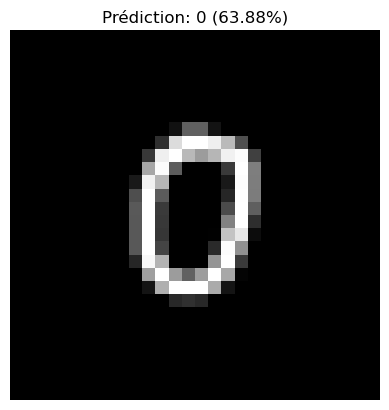

1/1 [==============================] - 0s 40ms/step
Classe prédite: 8, Confiance: 99.99%


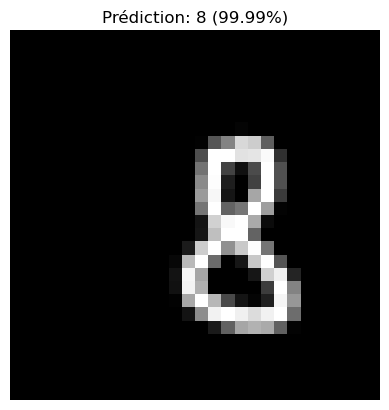

1/1 [==============================] - 0s 52ms/step
Classe prédite: 7, Confiance: 99.81%


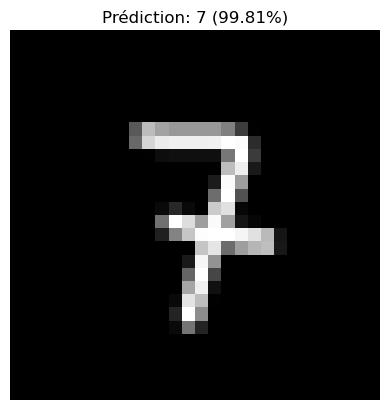

1/1 [==============================] - 0s 37ms/step
Classe prédite: 3, Confiance: 100.00%


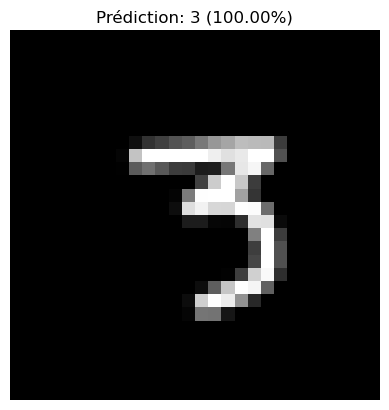

1/1 [==============================] - 0s 42ms/step
Classe prédite: 6, Confiance: 98.92%


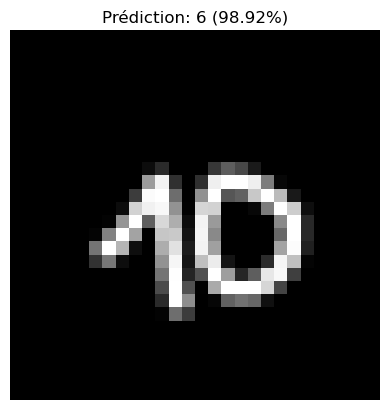

1/1 [==============================] - 0s 38ms/step
Classe prédite: 4, Confiance: 98.47%


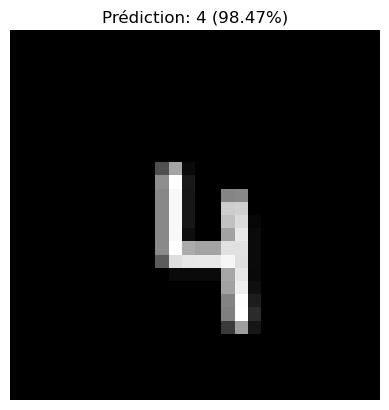

In [17]:
import tkinter as tk
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

# Dimensions pour le canevas et les images
CANVAS_WIDTH = 200
CANVAS_HEIGHT = 200
IMG_SIZE = 28  # Taille cible pour le modèle (28x28)

# Modèle déjà chargé
# cnn_model doit être défini et prêt à prédire
# Exemple : cnn_model = load_model("mon_modele.h5")

# Création d'une image PIL pour stocker le dessin
image = Image.new("L", (CANVAS_WIDTH, CANVAS_HEIGHT), "black")
draw = ImageDraw.Draw(image)

# Initialisation de la fenêtre tkinter
root = tk.Tk()
root.title("Dessinez un chiffre")

# Fonction pour dessiner sur le canevas
def paint(event):
    x1, y1 = (event.x - 5), (event.y - 5)
    x2, y2 = (event.x + 5), (event.y + 5)
    canvas.create_oval(x1, y1, x2, y2, fill="white", outline="white")
    draw.ellipse([x1, y1, x2, y2], fill="white")

# Fonction pour effacer le canevas
def clear_canvas():
    canvas.delete("all")
    draw.rectangle([0, 0, CANVAS_WIDTH, CANVAS_HEIGHT], fill="black")

# Fonction pour prédire en temps réel
def predict_image():
    # Redimensionner l'image en 28x28
    img = image.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0  # Normalisation entre 0 et 1
    img_array = np.expand_dims(img_array, axis=(0, -1))  # Ajouter les dimensions batch et canal

    # Effectuer une prédiction
    predictions = cnn_model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100

    # Afficher les résultats dans le terminal et la fenêtre matplotlib
    print(f"Classe prédite: {predicted_class}, Confiance: {confidence:.2f}%")
    plt.imshow(img_array.squeeze(), cmap="gray")
    plt.title(f"Prédiction: {predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

# Création du canevas tkinter
canvas = tk.Canvas(root, width=CANVAS_WIDTH, height=CANVAS_HEIGHT, bg="black")
canvas.pack()

# Lier les événements tkinter
canvas.bind("<B1-Motion>", paint)

# Boutons tkinter pour effacer et prédire
btn_clear = tk.Button(root, text="Effacer", command=clear_canvas)
btn_clear.pack(side=tk.LEFT, padx=10)

btn_predict = tk.Button(root, text="Prédire", command=predict_image)
btn_predict.pack(side=tk.RIGHT, padx=10)

# Lancer la fenêtre tkinter
root.mainloop()
